https://drive.google.com/file/d/1TWSUuVqKZGmCWjwL6QLcWjMI7MpP4sIu/view?usp=drive_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/hw/

In [ ]:
pwd

'/content'

#yolov8 훈련하기 시작

dataset을 저장할 폴더를 만들고 그곳으로 들어갑니다

In [ ]:
%mkdir dataset

In [ ]:
!cp /content/drive/MyDrive/hw/hw.zip /content/
#!cp /content/drive/MyDrive/data/train_team.zip /content/
#!cp /content/drive/MyDrive/data/val_team.zip /content/
#!cp /content/drive/MyDrive/data/test_team.zip /content/

In [ ]:
#!unzip /content/drive/MyDrive/team/team.zip -d /content/dataset/
!unzip /content/hw.zip -d /content/dataset/
#!unzip /content/drive/MyDrive/team/team.zip -d /content/drive/MyDrive/
#!unzip /content/train_team.zip -d dataset/train/
#!unzip /content/val_team.zip -d dataset/val/
#!unzip /content/test_team.zip -d dataset/test/

Archive:  /content/hw.zip
   creating: /content/dataset/hw/
 extracting: /content/dataset/hw/classes.txt  
   creating: /content/dataset/hw/export/
  inflating: /content/dataset/hw/export/T-90A_Edit0900.jpg  
  inflating: /content/dataset/hw/export/T-90A_Edit0715.txt  
  inflating: /content/dataset/hw/export/T-90A_Edit0715.jpg  
  inflating: /content/dataset/hw/export/T-90A_Edit0002.txt  
  inflating: /content/dataset/hw/export/M1A2_Edit0378.jpg  
  inflating: /content/dataset/hw/export/M1A2_Edit0264.txt  
  inflating: /content/dataset/hw/export/M1A2_Edit0055.txt  
  inflating: /content/dataset/hw/export/M1A2_Edit0053.txt  
  inflating: /content/dataset/hw/export/M1A2_Edit0053.jpg  
  inflating: /content/dataset/hw/export/K2_Edit00347.txt  
  inflating: /content/dataset/hw/export/K2_Edit00226.txt  
  inflating: /content/dataset/hw/export/K2_Edit00226.jpg  
  inflating: /content/dataset/hw/export/K2_Edit00020.txt  
  inflating: /content/dataset/hw/export/K1A1_Edit0370.txt  
  inflating:

In [ ]:
#%cd dataset

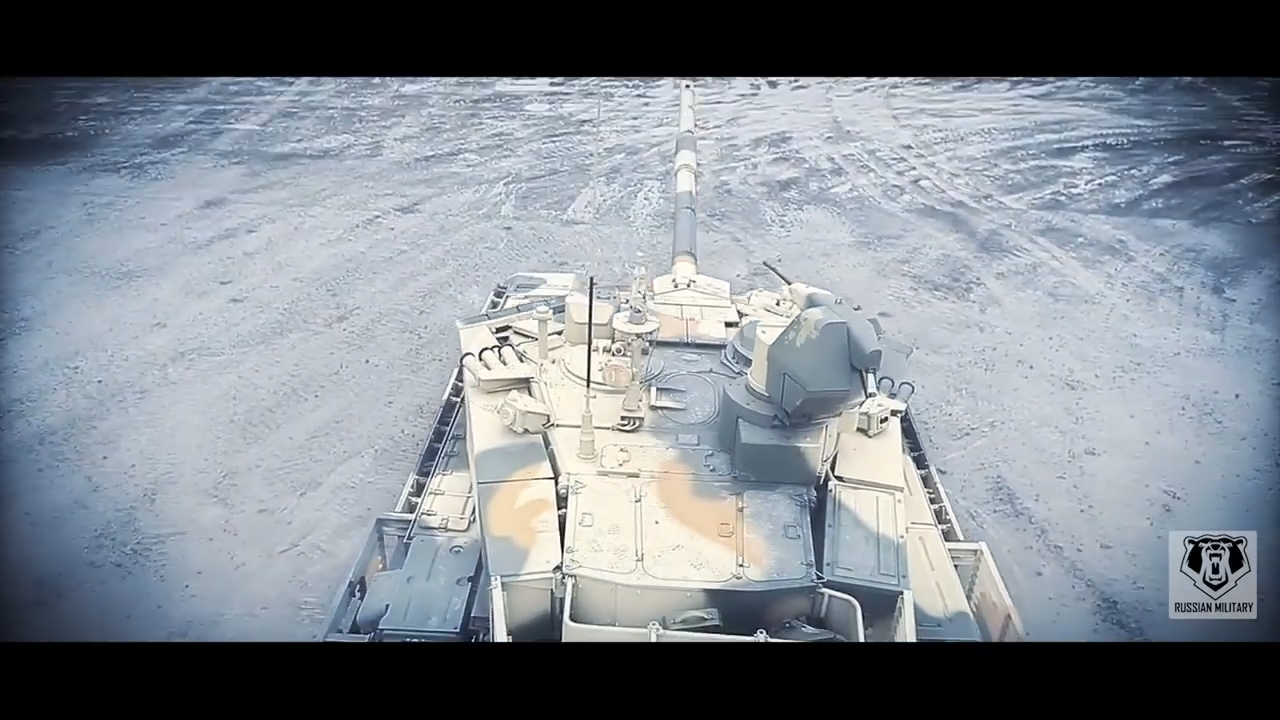

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import random


# 이미지 파일 경로를 가져오기
#image_paths = glob.glob('/content/drive/MyDrive/team/test/images/*.jpg')
#image_paths = glob.glob('/content/dataset/team/test/images/*.jpg')
image_paths = glob.glob('/content/dataset/hw/test/images/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    cv2_imshow(img)

해당경로에 이미지와 data.yaml이 나온것을 확인 할 수 있습니다

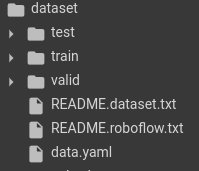

data.yaml을 확인합니다

In [ ]:
#%cat data.yaml

새로운 yaml파일을 만들고 train, val, test 데이터셋 경로가 올바른게 작성해줘야 합니다



```
변경전                       변경후
train: ../train/images  ->  'train' : '/content/dataset/train/images'
```



In [ ]:
import yaml

data = {'train' : '/content/dataset/hw/train/images',
        'test' : '/content/dataset/hw/test/images',
        'val' : '/content/dataset/hw/valid/images',
        'nc': 3,
        'names': ['paper','rock','scissors']
}

with open('/content/dataset/hw/custom_data.yaml', 'w') as f:
  yaml.dump(data, f)

custom_data.yaml 파일을 만들었으니 제대로 작성이 되었는지 확인합니다

In [ ]:
with open('/content/dataset/hw/custom_data.yaml', 'r') as f:
  view_yaml = yaml.safe_load(f)
  display(view_yaml)


{'names': ['K1', 'K1A1', 'M1A2', 'T-90A', '90'],
 'nc': 5,
 'test': '/content/dataset/hw/test/images',
 'train': '/content/dataset/hw/train/images',
 'val': '/content/dataset/hw/valid/images'}

yolov8을 인스톨합니다

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.2/887.2 kB 15.3 MB/s eta 0:00:00


yolov8이 제대로 설치가 되었는지 확인합니다

In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.2/235.7 GB disk)


사전에 학습된 yolov8n.pt를 가져오고 적용시킵니다

yolov8의 학습파일은 yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt 등이 있습니다

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 69.2MB/s]


yolov8에서 사용하는 model이 yolov8n.pt 인지 확인해봅니다

yolov8은 cocodata의 분류를 가져서 80개의 name이 저장되어있습니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

우리가 원하는 데이터셋 경로를 가진 custom_data.yaml을 가지고 학습을 시작합니다

In [ ]:
#model.train(data='/content/drive/MyDrive/team/custom_data.yaml', epochs= 25, patience = 20, batch=32, imgsz =416)
model.train(data='/content/dataset/hw/custom_data.yaml', epochs= 20, patience = 20, batch=2)

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/hw/custom_data.yaml, epochs=20, time=None, patience=20, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 11.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.2MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/hw/train/labels... 595 images, 0 backgrounds, 11 corrupt: 100%|██████████| 595/595 [00:00<00:00, 1834.10it/s]

train: WARNING ⚠️ /content/dataset/hw/train/images/90_Edit0022.jpg: ignoring corrupt image/label: Label class 22 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/dataset/hw/train/images/90_Edit0448.jpg: ignoring corrupt image/label: Label class 22 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/dataset/hw/train/images/90_Edit0489.jpg: ignoring corrupt image/label: Label class 22 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/dataset/hw/train/images/K1A1_Edit0108.jpg: ignoring corrupt image/label: Label class 19 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/dataset/hw/train/images/K1A1_Edit0113.jpg: ignoring corrupt image/label: Label class 19 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/dataset/hw/train/images/K1A1_Edit0369.jpg: ignoring corrupt image/label: Label class 19 exceeds dat

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/hw/valid/labels... 198 images, 0 backgrounds, 5 corrupt: 100%|██████████| 198/198 [00:00<00:00, 941.34it/s] 

val: WARNING ⚠️ /content/dataset/hw/valid/images/K1A1_Edit0318.jpg: ignoring corrupt image/label: Label class 19 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/dataset/hw/valid/images/K1A1_Edit0430.jpg: ignoring corrupt image/label: Label class 19 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/dataset/hw/valid/images/M1A2_Edit0267.jpg: ignoring corrupt image/label: Label class 20 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/dataset/hw/valid/images/T-90A_Edit0758.jpg: ignoring corrupt image/label: Label class 21 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/dataset/hw/valid/images/T-90A_Edit0975.jpg: ignoring corrupt image/label: Label class 21 exceeds dataset class count 5. Possible class labels are 0-4
val: New cache created: /content/dataset/hw/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.409G        1.1      2.751      1.347          3        640: 100%|██████████| 292/292 [00:36<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:04<00:00, 10.87it/s]

                   all        193        217      0.606      0.737      0.704      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.354G      1.019      1.907       1.27          9        640: 100%|██████████| 292/292 [00:33<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 15.68it/s]

                   all        193        217      0.837      0.874       0.86       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.357G     0.9884        1.7      1.247          5        640: 100%|██████████| 292/292 [00:33<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.56it/s]


                   all        193        217      0.894      0.866      0.891      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.354G      0.987      1.549      1.238          8        640: 100%|██████████| 292/292 [00:32<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.12it/s]

                   all        193        217      0.843      0.878      0.869      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.354G     0.9458      1.426      1.198          6        640: 100%|██████████| 292/292 [00:33<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 15.12it/s]


                   all        193        217      0.907      0.867      0.891      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.354G     0.9392      1.262       1.19          6        640: 100%|██████████| 292/292 [00:32<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 16.04it/s]

                   all        193        217      0.876      0.923      0.906      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.354G     0.9116      1.194      1.185          7        640: 100%|██████████| 292/292 [00:33<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 15.93it/s]

                   all        193        217      0.908      0.893      0.896      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.354G     0.9073      1.171      1.169          5        640: 100%|██████████| 292/292 [00:32<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 12.39it/s]


                   all        193        217      0.908      0.926      0.904      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.354G     0.8582      1.062      1.145          5        640: 100%|██████████| 292/292 [00:32<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.40it/s]

                   all        193        217       0.88      0.923      0.876      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.354G     0.8325      1.023      1.134          7        640: 100%|██████████| 292/292 [00:32<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:04<00:00, 12.15it/s]

                   all        193        217      0.902      0.916      0.906      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.354G     0.7735      1.111      1.115          2        640: 100%|██████████| 292/292 [00:33<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 15.87it/s]

                   all        193        217      0.902      0.916      0.881      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.354G     0.7528      1.004      1.093          3        640: 100%|██████████| 292/292 [00:32<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 16.01it/s]

                   all        193        217      0.899      0.921      0.912      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.354G     0.7397     0.9426      1.076          3        640: 100%|██████████| 292/292 [00:33<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 14.12it/s]

                   all        193        217      0.902       0.92      0.914       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.354G     0.7374     0.9352      1.073          2        640: 100%|██████████| 292/292 [00:32<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.46it/s]

                   all        193        217        0.9      0.925      0.911      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.352G     0.7125     0.8684      1.059          2        640: 100%|██████████| 292/292 [00:32<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.36it/s]

                   all        193        217      0.896      0.914      0.913      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.354G     0.6888      0.815      1.042          2        640: 100%|██████████| 292/292 [00:32<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 13.30it/s]

                   all        193        217      0.892      0.919      0.913      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.352G     0.6901     0.8051      1.048          3        640: 100%|██████████| 292/292 [00:33<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 16.16it/s]


                   all        193        217      0.902      0.917      0.911      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.352G     0.6645     0.7684      1.039          2        640: 100%|██████████| 292/292 [00:32<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 15.95it/s]

                   all        193        217      0.905       0.92      0.912      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.352G     0.6623     0.7562       1.04          2        640: 100%|██████████| 292/292 [00:33<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 16.08it/s]


                   all        193        217      0.903      0.921      0.911      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.352G     0.6432     0.7449      1.011          4        640: 100%|██████████| 292/292 [00:32<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 13.13it/s]

                   all        193        217      0.898      0.911      0.911      0.743



20 epochs completed in 0.211 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:04<00:00,  9.81it/s]


                   all        193        217      0.902      0.918      0.911      0.747
                    K1         41         42      0.921      0.905      0.879       0.73
                  K1A1         40         43      0.921      0.907      0.931      0.727
                  M1A2         48         48      0.947      0.938       0.95      0.853
                 T-90A         41         41      0.973      0.885      0.932      0.697
                    90         27         43      0.749      0.953      0.862       0.73
Speed: 0.8ms preprocess, 8.9ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc1551bad40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

학습한 결과 분석은 다음경로에 새롭게 저장되었습니다

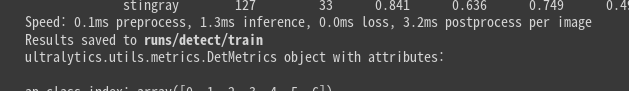

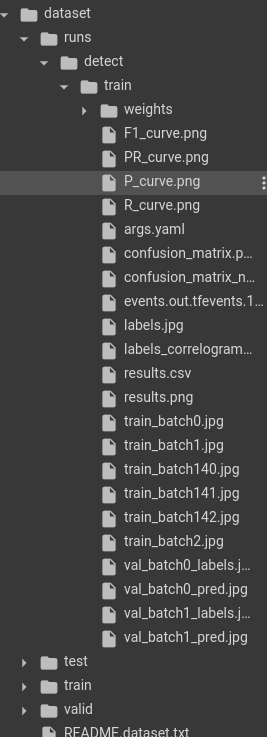

학습한 모델은 weights/best.pt 로 저장되어있습니다

yolov8은 학습하고 나서 자동적으로 모델을 변경합니다

실제로 변경되는지 확인합니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 5
{0: 'K1', 1: 'K1A1', 2: 'M1A2', 3: 'T-90A', 4: '90'}


학습된 결과물을 출력하는 부분입니다

마지막 출력문인 'Results saved to '이후에 나오는 경로가 학습된 이미지 출력이 있는 폴더의 경로입니다

image.png

In [ ]:
results = model.predict(source ='/content/dataset/hw/test/images/', save=True)


image 1/200 /content/dataset/hw/test/images/90_Edit0005.jpg: 384x640 2 90s, 160.0ms
image 2/200 /content/dataset/hw/test/images/90_Edit0017.jpg: 384x640 2 90s, 10.1ms
image 3/200 /content/dataset/hw/test/images/90_Edit0020.jpg: 384x640 2 90s, 13.3ms
image 4/200 /content/dataset/hw/test/images/90_Edit0036.jpg: 384x640 2 90s, 10.0ms
image 5/200 /content/dataset/hw/test/images/90_Edit0052.jpg: 384x640 2 90s, 9.2ms
image 6/200 /content/dataset/hw/test/images/90_Edit0053.jpg: 384x640 2 90s, 16.7ms
image 7/200 /content/dataset/hw/test/images/90_Edit0086.jpg: 384x640 2 90s, 19.7ms
image 8/200 /content/dataset/hw/test/images/90_Edit0111.jpg: 384x640 2 90s, 49.6ms
image 9/200 /content/dataset/hw/test/images/90_Edit0130.jpg: 384x640 2 90s, 20.6ms
image 10/200 /content/dataset/hw/test/images/90_Edit0137.jpg: 384x640 2 90s, 41.2ms
image 11/200 /content/dataset/hw/test/images/90_Edit0162.jpg: 384x640 2 90s, 11.9ms
image 12/200 /content/dataset/hw/test/images/90_Edit0181.jpg: 384x640 2 90s, 38.3ms


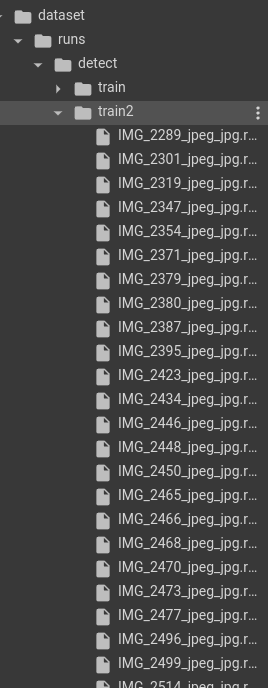

해당 경로에서 랜덤으로 이미지 출력을 보는 코드입니다

colab은 특수한 패키지를 사용해야 볼 수 있습니다

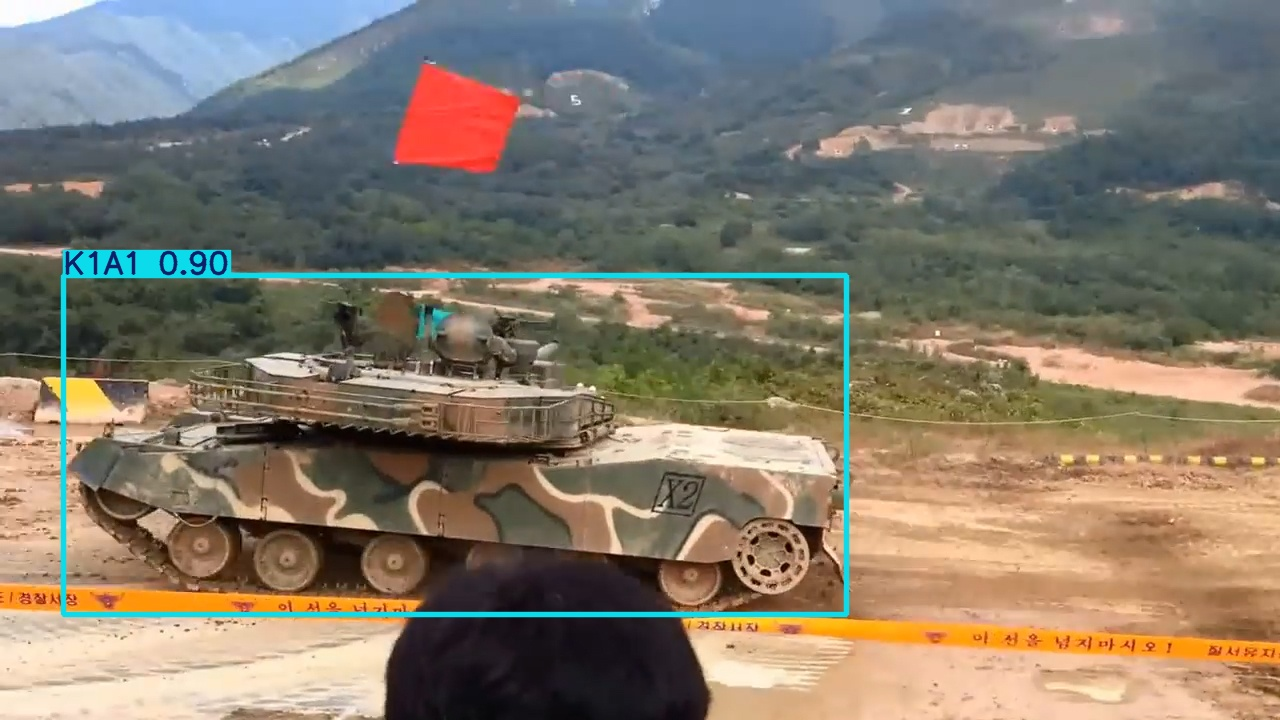

In [ ]:

# 이미지 파일 경로를 가져오기
image_paths = glob.glob('/content/runs/detect/train2/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    cv2_imshow(img)

만약 실제로 학습한 데이터를 자신의 드라이브에 저장하고 싶다면

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%mkdir /content/drive/MyDrive/hw

mkdir: cannot create directory ‘/content/drive/MyDrive/hw’: File exists


In [ ]:
%cp runs/detect/train/weights/best.pt /content/drive/MyDrive/hw